# Predictive maintanance

Made by: Joey Einerhand, Cédric Cortenraede, Lennox Narinx, Giuseppe Collura

## Data loading
_Loading all the text files with data to use for the prediction model._

In [1]:
import pandas as pd

# Cooler condition (%)
df_ce = pd.read_csv("data/CE.txt", sep="\t", header=None, names=["CE"])

# Valve condition (%)
df_se = pd.read_csv("data/SE.txt", sep="\t", header=None, names=["SE"])

# Internal pump leakage (l/min)
df_fs1 = pd.read_csv("data/FS1.txt", sep="\t", header=None, names=["FS1"])
df_fs2 = pd.read_csv("data/FS2.txt", sep="\t", header=None, names=["FS2"])

# Hydraulic accumulator (bar)
df_ps1 = pd.read_csv("data/PS1.txt", sep="\t", header=None, names=["PS1"])
df_ps2 = pd.read_csv("data/PS2.txt", sep="\t", header=None, names=["PS2"])
df_ps3 = pd.read_csv("data/PS3.txt", sep="\t", header=None, names=["PS3"])
df_ps4 = pd.read_csv("data/PS4.txt", sep="\t", header=None, names=["PS4"])
df_ps5 = pd.read_csv("data/PS5.txt", sep="\t", header=None, names=["PS5"])
df_ps6 = pd.read_csv("data/PS6.txt", sep="\t", header=None, names=["PS6"])

# Temperature (°C)
df_ts1 = pd.read_csv("data/TS1.txt", sep="\t", header=None, names=["TS1"])
df_ts2 = pd.read_csv("data/TS2.txt", sep="\t", header=None, names=["TS2"])
df_ts3 = pd.read_csv("data/TS3.txt", sep="\t", header=None, names=["TS3"])
df_ts4 = pd.read_csv("data/TS4.txt", sep="\t", header=None, names=["TS4"])


# Severity grade for each type
df_severity = pd.read_csv("data/profile.txt", sep="\t", header=None, names=["Severity"])

## Data Cleaning
_After loading all the data this data will be transformed to be used for the prediction model._


1. First the sensors with multiple data points will be added to a single DataFrame.  
2. Then all DataFrames will be added to a single DataFrame for easier access to the data.
3. The order of columns will be changed next for a more logical order.

In [2]:
# Make seperate dataframes from loaded data
# Dataframe for Internal pump leakage
df_fs = pd.DataFrame()

df_fs["FS1"] = df_fs1["FS1"].to_numpy()
df_fs["FS2"] = df_fs2["FS2"].to_numpy()

# Dataframe for hydraulic accumulator
df_ps = pd.DataFrame()
df_ps["PS1"] = df_ps1["PS1"].to_numpy()
df_ps["PS2"] = df_ps2["PS2"].to_numpy()
df_ps["PS3"] = df_ps3["PS3"].to_numpy()
df_ps["PS4"] = df_ps4["PS4"].to_numpy()
df_ps["PS5"] = df_ps5["PS5"].to_numpy()
df_ps["PS6"] = df_ps6["PS6"].to_numpy()

# Dataframe for temperature
df_ts = pd.DataFrame()
df_ts["TS1"] = df_ts1["TS1"].to_numpy()
df_ts["TS2"] = df_ts2["TS2"].to_numpy()
df_ts["TS3"] = df_ts3["TS3"].to_numpy()
df_ts["TS4"] = df_ts4["TS4"].to_numpy()

In [3]:
# Add all data into a single DataFrame for easy access.
df = pd.concat([df_fs, df_ps, df_ts], axis=1, join="inner")
df["CE"] = df_ce["CE"].to_numpy()
df["SE"] = df_se["SE"].to_numpy()
df["Severity"] = df_severity["Severity"].to_numpy()

df = df.reindex(columns=["CE", "SE", "FS1", "FS2", "PS1", "PS2", "PS3", "PS4", "PS5", "PS6", "TS1", "TS2", "TS3", "TS4", "Severity"])

df

,CE,SE,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,TS1,TS2,TS3,TS4,Severity
0,28.866,68.264,8.036,10.373,151.19,125.10,2.211,0.000,9.722,9.615,36.152,41.250,38.594,33.555,1
1,23.588,68.595,7.890,10.391,150.86,125.04,2.219,0.000,9.623,9.517,37.477,42.105,39.250,35.121,1
2,21.519,68.628,7.952,10.356,150.62,124.88,2.266,0.000,9.521,9.423,38.621,43.035,40.043,36.121,1
3,20.403,68.868,7.773,10.261,150.28,124.59,2.273,0.000,9.420,9.325,39.461,43.988,40.922,36.988,1
4,20.016,68.972,7.825,10.216,150.19,124.51,2.297,0.000,9.333,9.231,40.391,44.871,41.758,37.754,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,46.382,68.234,7.874,10.171,151.86,125.73,2.273,10.207,9.979,9.854,35.414,40.922,38.187,30.379,0
2201,46.729,68.094,7.787,10.174,151.78,125.44,2.406,10.193,9.953,9.837,35.398,40.891,38.195,30.375,0
2202,46.502,68.083,7.685,10.171,151.83,125.94,2.250,10.246,9.998,9.870,35.437,40.898,38.160,30.379,0
2203,46.570,68.077,7.793,10.189,151.78,125.91,2.281,10.189,9.953,9.842,35.441,40.898,38.176,30.375,0


## Predicting LSTM
_Long Short Term Memory_

,TS4
0,33.555
1,35.121
2,36.121
3,36.988
4,37.754


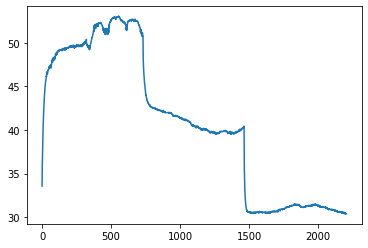

In [4]:
import matplotlib.pyplot as plt
import datetime
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.plot(df_ts["TS4"], label="TS4 plot")

# Get first 400 lines to use in predicting and training
#data = pd.DataFrame(index=range(0, 400), columns=["Time", "CE"])
data = pd.DataFrame(index=range(0, len(df_ts["TS4"])), columns=["TS4"])
for i in range(0, len(data)):
    data["TS4"][i] = df_ts["TS4"][i]

#data["Time"] = data["Time"].astype(int)
data["TS4"] = data["TS4"].astype(float)

data.head()

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))

dataset = scaler.fit_transform(data)

# split into train and test sets
# Train is the dataset which the model is trained on
# Test is the dataset which the model is verified with
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

1764 441


In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
#model.add(LSTM(4, return_sequences=True,stateful=True, batch_input_shape=(1, None,  look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
1762/1762 - 2s - loss: 0.0150 - 2s/epoch - 1ms/step
Epoch 2/500
1762/1762 - 1s - loss: 1.2468e-04 - 1s/epoch - 644us/step
Epoch 3/500
1762/1762 - 1s - loss: 8.3141e-05 - 1s/epoch - 661us/step
Epoch 4/500
1762/1762 - 1s - loss: 7.6707e-05 - 1s/epoch - 649us/step
Epoch 5/500
1762/1762 - 1s - loss: 8.2609e-05 - 1s/epoch - 654us/step
Epoch 6/500
1762/1762 - 1s - loss: 8.2609e-05 - 1s/epoch - 645us/step
Epoch 7/500
1762/1762 - 1s - loss: 8.2676e-05 - 1s/epoch - 640us/step
Epoch 8/500
1762/1762 - 1s - loss: 8.0701e-05 - 1s/epoch - 638us/step
Epoch 9/500
1762/1762 - 1s - loss: 7.8937e-05 - 1s/epoch - 638us/step
Epoch 10/500
1762/1762 - 1s - loss: 8.1978e-05 - 1s/epoch - 647us/step
Epoch 11/500
1762/1762 - 1s - loss: 7.8415e-05 - 1s/epoch - 638us/step
Epoch 12/500
1762/1762 - 1s - loss: 8.0170e-05 - 1s/epoch - 638us/step
Epoch 13/500
1762/1762 - 1s - loss: 7.8245e-05 - 1s/epoch - 644us/step
Epoch 14/500
1762/1762 - 1s - loss: 8.0964e-05 - 1s/epoch - 659us/step
Epoch 15/500
1762/176

Epoch 117/500
1762/1762 - 1s - loss: 6.6548e-05 - 1s/epoch - 645us/step
Epoch 118/500
1762/1762 - 1s - loss: 6.8512e-05 - 1s/epoch - 644us/step
Epoch 119/500
1762/1762 - 1s - loss: 6.8082e-05 - 1s/epoch - 645us/step
Epoch 120/500
1762/1762 - 1s - loss: 6.8708e-05 - 1s/epoch - 648us/step
Epoch 121/500
1762/1762 - 1s - loss: 6.7124e-05 - 1s/epoch - 649us/step
Epoch 122/500
1762/1762 - 1s - loss: 6.8409e-05 - 1s/epoch - 636us/step
Epoch 123/500
1762/1762 - 1s - loss: 6.3685e-05 - 1s/epoch - 637us/step
Epoch 124/500
1762/1762 - 1s - loss: 6.4687e-05 - 1s/epoch - 636us/step
Epoch 125/500
1762/1762 - 1s - loss: 6.3117e-05 - 1s/epoch - 638us/step
Epoch 126/500
1762/1762 - 1s - loss: 7.0131e-05 - 1s/epoch - 637us/step
Epoch 127/500
1762/1762 - 1s - loss: 6.6748e-05 - 1s/epoch - 638us/step
Epoch 128/500
1762/1762 - 1s - loss: 6.5431e-05 - 1s/epoch - 643us/step
Epoch 129/500
1762/1762 - 1s - loss: 6.4682e-05 - 1s/epoch - 645us/step
Epoch 130/500
1762/1762 - 1s - loss: 6.6058e-05 - 1s/epoch - 643

Epoch 231/500
1762/1762 - 1s - loss: 6.5667e-05 - 1s/epoch - 651us/step
Epoch 232/500
1762/1762 - 1s - loss: 6.4082e-05 - 1s/epoch - 650us/step
Epoch 233/500
1762/1762 - 1s - loss: 6.3986e-05 - 1s/epoch - 651us/step
Epoch 234/500
1762/1762 - 1s - loss: 6.5598e-05 - 1s/epoch - 652us/step
Epoch 235/500
1762/1762 - 1s - loss: 6.4740e-05 - 1s/epoch - 653us/step
Epoch 236/500
1762/1762 - 1s - loss: 6.3836e-05 - 1s/epoch - 648us/step
Epoch 237/500
1762/1762 - 1s - loss: 6.4908e-05 - 1s/epoch - 645us/step
Epoch 238/500
1762/1762 - 1s - loss: 6.4518e-05 - 1s/epoch - 644us/step
Epoch 239/500
1762/1762 - 1s - loss: 6.4269e-05 - 1s/epoch - 653us/step
Epoch 240/500
1762/1762 - 1s - loss: 6.4926e-05 - 1s/epoch - 649us/step
Epoch 241/500
1762/1762 - 1s - loss: 6.2526e-05 - 1s/epoch - 649us/step
Epoch 242/500
1762/1762 - 1s - loss: 6.4677e-05 - 1s/epoch - 645us/step
Epoch 243/500
1762/1762 - 1s - loss: 6.4525e-05 - 1s/epoch - 640us/step
Epoch 244/500
1762/1762 - 1s - loss: 6.4982e-05 - 1s/epoch - 641

Epoch 345/500
1762/1762 - 1s - loss: 6.0114e-05 - 1s/epoch - 644us/step
Epoch 346/500
1762/1762 - 1s - loss: 6.4198e-05 - 1s/epoch - 647us/step
Epoch 347/500
1762/1762 - 1s - loss: 6.5512e-05 - 1s/epoch - 648us/step
Epoch 348/500
1762/1762 - 1s - loss: 6.2122e-05 - 1s/epoch - 650us/step
Epoch 349/500
1762/1762 - 1s - loss: 6.3724e-05 - 1s/epoch - 645us/step
Epoch 350/500
1762/1762 - 1s - loss: 6.3781e-05 - 1s/epoch - 645us/step
Epoch 351/500
1762/1762 - 1s - loss: 6.3438e-05 - 1s/epoch - 641us/step
Epoch 352/500
1762/1762 - 1s - loss: 6.3471e-05 - 1s/epoch - 645us/step
Epoch 353/500
1762/1762 - 1s - loss: 6.4387e-05 - 1s/epoch - 639us/step
Epoch 354/500
1762/1762 - 1s - loss: 6.3268e-05 - 1s/epoch - 640us/step
Epoch 355/500
1762/1762 - 1s - loss: 6.3698e-05 - 1s/epoch - 640us/step
Epoch 356/500
1762/1762 - 1s - loss: 6.3871e-05 - 1s/epoch - 642us/step
Epoch 357/500
1762/1762 - 1s - loss: 6.3248e-05 - 1s/epoch - 644us/step
Epoch 358/500
1762/1762 - 1s - loss: 6.1910e-05 - 1s/epoch - 648

Epoch 459/500
1762/1762 - 1s - loss: 6.5355e-05 - 1s/epoch - 683us/step
Epoch 460/500
1762/1762 - 1s - loss: 6.4789e-05 - 1s/epoch - 696us/step
Epoch 461/500
1762/1762 - 1s - loss: 6.3635e-05 - 1s/epoch - 709us/step
Epoch 462/500
1762/1762 - 1s - loss: 6.2850e-05 - 1s/epoch - 697us/step
Epoch 463/500
1762/1762 - 1s - loss: 6.3354e-05 - 1s/epoch - 697us/step
Epoch 464/500
1762/1762 - 1s - loss: 6.2163e-05 - 1s/epoch - 680us/step
Epoch 465/500
1762/1762 - 1s - loss: 6.3198e-05 - 1s/epoch - 666us/step
Epoch 466/500
1762/1762 - 1s - loss: 6.2436e-05 - 1s/epoch - 669us/step
Epoch 467/500
1762/1762 - 1s - loss: 6.3998e-05 - 1s/epoch - 669us/step
Epoch 468/500
1762/1762 - 1s - loss: 6.4231e-05 - 1s/epoch - 648us/step
Epoch 469/500
1762/1762 - 1s - loss: 6.2941e-05 - 1s/epoch - 637us/step
Epoch 470/500
1762/1762 - 1s - loss: 6.4957e-05 - 1s/epoch - 636us/step
Epoch 471/500
1762/1762 - 1s - loss: 6.3789e-05 - 1s/epoch - 636us/step
Epoch 472/500
1762/1762 - 1s - loss: 6.2625e-05 - 1s/epoch - 649

In [11]:
# make predictions
import math
from sklearn.metrics import mean_squared_error 

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)

#reshape
trainY.reshape((len(trainY), 1))


trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)


testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.19 RMSE
Test Score: 0.08 RMSE


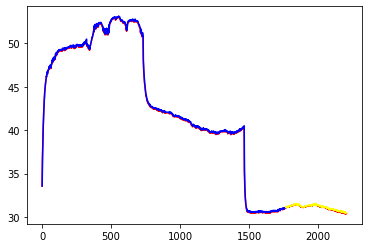

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color="red")
plt.plot(trainPredictPlot, color="blue")
plt.plot((testPredictPlot), color="yellow")
plt.show()

In [13]:
x = np.array([2805])

x = x.reshape((1, len(x), 1))

ypred = model.predict(x, verbose=0)

ypred

array([[2.4892898]], dtype=float32)

In [14]:
n_head = 1000
dataset_predict = dataset
print(dataset)

dataset_predict = dataset_predict.reshape((-1))
#print(prediction_list)
#OriginalDataset = scaler.inverse_transform(dataset[-look_back:])
prediction_list = dataset_predict[-look_back:]
print(prediction_list)
print(prediction_list[-look_back:])
print(type(prediction_list[-look_back:]))

[[0.14074074]
 [0.20978836]
 [0.25388007]
 ...
 [0.00070547]
 [0.0005291 ]
 [0.0005291 ]]
[0.0005291]
[0.0005291]
<class 'numpy.ndarray'>


[[30.375]]
     predictions
2204      30.375


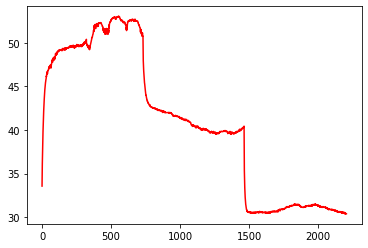

In [15]:
prediction_list = prediction_list[look_back-1:]

predictions_df = pd.DataFrame(index=range(len(prediction_list)), columns=["predictions"])
for i in range(len(prediction_list)):
    predictions_df["predictions"][i] = prediction_list[i]

predictions_df = scaler.inverse_transform(predictions_df)
print(predictions_df)
# Make new dataframe for predictions so we can plot them
# Make the index start after the baseline stops. So if baseline has index 0 to 1999,
# The first element in predictions_df should have an index of 2000.
results_df = pd.DataFrame(index=range(len(dataset) - 1, len(dataset) - 1 + len(prediction_list)), columns=["predictions"])
for i in range(len(predictions_df)):
    results_df["predictions"][len(dataset) - 1 + i] = predictions_df[i][0]
print(results_df)
# plot baseline
dataset.reshape(1, -1)
plt.plot(scaler.inverse_transform(dataset), color="red")
# plt.plot(trainPredictPlot, color="blue")
# plt.plot(testPredictPlot, color="yellow")

# Plot the future predictions
plt.plot(results_df, color="purple")
plt.show()

In [16]:

for i in range(n_head):
    x = np.array([len(dataset) + i])
    x = x.reshape((1, len(x), 1))
    x = scaler.fit_transform(x)
    ypred = model.predict(x, verbose=0)
    results_df["predictions"][len(dataset) + i] = scaler.inverse_transform(ypred)

   

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
plt.plot(scaler.inverse_transform(dataset), color="red")
# plt.plot(trainPredictPlot, color="blue")
# plt.plot(testPredictPlot, color="yellow")

# Plot the future predictions
plt.plot(results_df, color="purple")
print(results_df)
plt.show() 

In [ ]:
# # Predict
# for _ in range(n_head):
#     x = prediction_list[-look_back:]
#     print("The number to use when predicting is: " + str(x))
#     x = x.reshape((1, look_back, 1))
#     print(model.predict(x)[0][0])
#     out = model.predict(x)[0][0]
#     print("The predicted number is: " + str(out))
#     #out = out * min(dataset_predict) + (max(dataset_predict)+min(dataset_predict))
#     prediction_list = np.append(prediction_list, (out))
    
# x = pd.DataFrame(index=range(len(dataset_predict) - 1, len(dataset_predict) - 1 + n_head), columns=["TS4"])
# for i in range(len(dataset_predict), len(dataset_predict) + n_head):
#     x["TS4"].append(i)
results_df = pd.DataFrame(index=range(len(dataset), len(dataset) - 1 + n_head), columns=["predictions"])
results_df.head()